In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/Users/jd/Desktop/Data_Analysis/dataset.csv')

In [3]:
# print the first 5 rows of the dataframe
df.head(5)

,Entry_ID,BPM,SPO2,BODY_TEMPERATURE,CVD
0,1,113,82,34.118956,No
1,2,75,86,41.269414,No
2,3,75,104,31.644519,No
3,4,95,102,34.104851,No
4,5,46,107,33.171709,No


In [4]:
# data shape
df.shape

(15000, 5)

In [5]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entry_ID          15000 non-null  int64  
 1   BPM               15000 non-null  int64  
 2   SPO2              15000 non-null  int64  
 3   BODY_TEMPERATURE  15000 non-null  float64
 4   CVD               15000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 586.1+ KB


In [6]:
#'CVD' contains binary values like 'Yes' and 'No', encode them as 0 and 1
df['CVD'] = df['CVD'].map({'No': 0, 'Yes': 1})

# Convert the datatype of 'GENDER' and 'smoke' columns to integer
df['CVD'] = df['CVD'].astype(int)

# Verify the changes
print(df.dtypes)

# Save the updated dataset
df.to_csv('updated_dataset.csv', index=False)

Entry_ID              int64
BPM                   int64
SPO2                  int64
BODY_TEMPERATURE    float64
CVD                   int64
dtype: object


In [7]:
df.head(5)

,Entry_ID,BPM,SPO2,BODY_TEMPERATURE,CVD
0,1,113,82,34.118956,0
1,2,75,86,41.269414,0
2,3,75,104,31.644519,0
3,4,95,102,34.104851,0
4,5,46,107,33.171709,0


# Data Analysis

# Descriptive statistics for all columns

In [8]:
# Define a function to compute coefficient of variation
def coefficient_of_variation(data):
    return np.std(data) / np.mean(data) * 100

In [9]:
# Compute descriptive statistics
mean_values = df.mean()
variance_values = df.var()
max_values = df.max()
std_dev_values = df.std()
cv_values = df.apply(coefficient_of_variation)

In [10]:
# Combine results into a DataFrame
descriptive_stats = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Max': max_values,
    'Standard Deviation': std_dev_values,
    'Coefficient of Variation': cv_values
})

In [11]:
# Tabulate the results
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                         Mean      Variance          Max  Standard Deviation  \
Entry_ID          7500.500000  1.875125e+07  15000.00000         4330.271354   
BPM                 94.557800  1.021763e+03    149.00000           31.965022   
SPO2                99.573267  1.342829e+02    119.00000           11.588051   
BODY_TEMPERATURE    35.742773  1.088169e+01     41.49659            3.298741   
CVD                  0.016600  1.632553e-02      1.00000            0.127771   

                  Coefficient of Variation  
Entry_ID                         57.731178  
BPM                              33.803617  
SPO2                             11.637325  
BODY_TEMPERATURE                  9.228806  
CVD                             769.681518  


# identify the highest levels of BMI, BPM, SPO2 and body temperature

In [12]:
# Identify the index of the highest values for BMI, BPM, SPO2, and body temperature
max_bpm_index = df['BPM'].idxmax()
max_spo2_index = df['SPO2'].idxmax()
max_temp_index = df['BODY_TEMPERATURE'].idxmax()

# Retrieve the corresponding values
max_bpm = df.loc[max_bpm_index, 'BPM']
max_spo2 = df.loc[max_spo2_index, 'SPO2']
max_temp = df.loc[max_temp_index, 'BODY_TEMPERATURE']

# Create a DataFrame to display the results
highest_levels = pd.DataFrame({
    'Metric': ['BPM', 'SPO2', 'Body Temperature'],
    'Highest Level': [max_bpm, max_spo2, max_temp]
})

# Display the results
print("Highest Levels:")
print(highest_levels)


Highest Levels:
             Metric  Highest Level
0               BPM      149.00000
1              SPO2      119.00000
2  Body Temperature       41.49659


# Machine Learning

# Training a Support Vector Machines (SVM) model for predicting CVD

In [13]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the dataset
df = pd.read_csv('updated_dataset.csv')

In [15]:
# Assuming 'cardiac_illness' is the target variable
X = df.drop('CVD', axis=1)  # Features
y = df['CVD']  # Target variable

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [19]:
# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
import joblib

# Define the file path where you want to save the model
model_file_path = '/Users/jd/Desktop/Data_Analysis/svm_classifier_model.pkl'

# Save the trained model to disk
joblib.dump(svm_classifier, model_file_path)

print("Model saved successfully at:", model_file_path)

Model saved successfully at: /Users/jd/Desktop/Data_Analysis/svm_classifier_model.pkl


In [21]:
# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test_scaled)

In [22]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.985


In [23]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2955
           1       0.00      0.00      0.00        45

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.50      3000
weighted avg       0.97      0.98      0.98      3000



# visualizing the correlation between features

In [24]:
import matplotlib.pyplot as plt

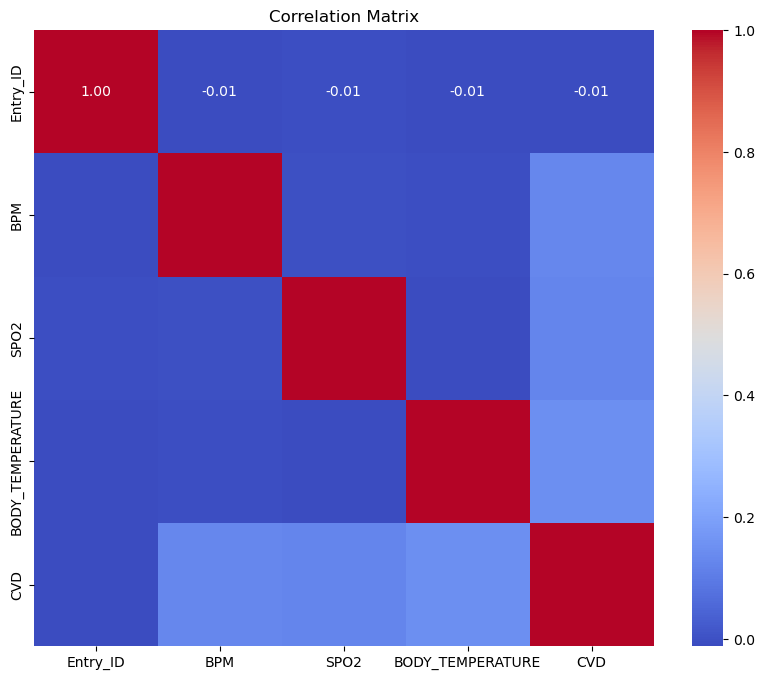

In [25]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# # Create a pairplot (scatter plot matrix)

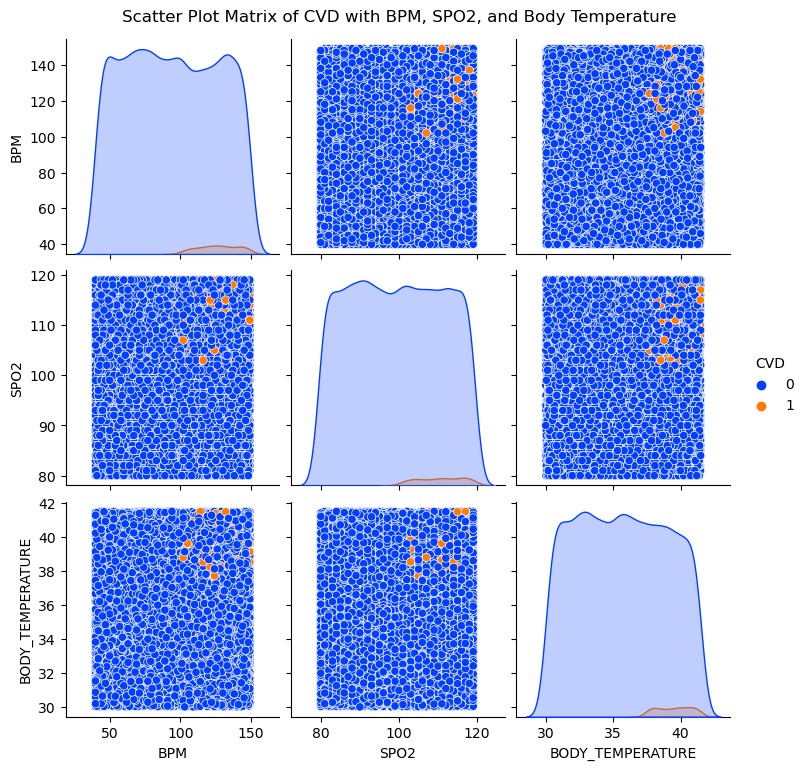

In [26]:
import seaborn as sns

sns.pairplot(df, hue='CVD', vars=['BPM', 'SPO2', 'BODY_TEMPERATURE'], palette='bright')
plt.suptitle('Scatter Plot Matrix of CVD with BPM, SPO2, and Body Temperature', y=1.02)
plt.show()
